In [16]:
# Load libraries, Python 2.7

import numpy as np 
import scipy as sp
from math import *
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [17]:
df = pd.read_table('./MIST_iso_5a2d59896215f.isoc.txt',header=0,delimiter=r"\s+" , error_bad_lines=False)
df[df.EEP.str.contains("E") == False]

df = df.loc[df['EEP'] == '202']
cols = df.columns

df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

df.head()

b'Skipping line 1650: expected 25 fields, saw 26\nSkipping line 1936: expected 25 fields, saw 26\nSkipping line 2222: expected 25 fields, saw 26\nSkipping line 2512: expected 25 fields, saw 26\nSkipping line 2804: expected 25 fields, saw 26\nSkipping line 3098: expected 25 fields, saw 26\nSkipping line 3396: expected 25 fields, saw 26\nSkipping line 3705: expected 25 fields, saw 26\nSkipping line 4030: expected 25 fields, saw 26\nSkipping line 4627: expected 25 fields, saw 26\nSkipping line 5359: expected 25 fields, saw 26\nSkipping line 6086: expected 25 fields, saw 26\nSkipping line 6808: expected 25 fields, saw 26\nSkipping line 7526: expected 25 fields, saw 26\nSkipping line 8239: expected 25 fields, saw 26\nSkipping line 8947: expected 25 fields, saw 26\nSkipping line 9651: expected 25 fields, saw 26\nSkipping line 10350: expected 25 fields, saw 26\nSkipping line 11044: expected 25 fields, saw 26\nSkipping line 11734: expected 25 fields, saw 26\nSkipping line 12419: expected 25 fi

,EEP,log10_isochrone_age_yr,initial_mass,star_mass,star_mdot,he_core_mass,c_core_mass,log_L,log_LH,log_LHe,...,surface_he4,surface_c12,surface_o16,log_center_T,log_center_Rho,center_gamma,center_h1,center_he4,center_c12,phase
187,202,5.1,11.125432,11.124679,-8.884848e-10,0.0,0.0,3.948824,3.902820,-29.043622,...,0.270140,0.002496,0.006107,7.528363,0.991597,0.015933,0.714757,0.270551,0.000023,0.0
451,202,5.2,9.996253,9.995706,-3.845909e-10,0.0,0.0,3.806676,3.762336,-29.491640,...,0.270113,0.002495,0.006106,7.519355,1.041484,0.016900,0.714756,0.270551,0.000022,0.0
716,202,5.3,9.199121,9.198977,-1.359980e-10,0.0,0.0,3.687836,3.642073,-29.883062,...,0.269927,0.002494,0.006102,7.511709,1.079694,0.017717,0.714748,0.270558,0.000022,0.0
985,202,5.4,8.412223,8.412183,-6.255565e-11,0.0,0.0,3.554300,3.512438,-30.310898,...,0.269840,0.002493,0.006100,7.503195,1.125483,0.018745,0.714745,0.270561,0.000021,0.0
1255,202,5.5,7.628733,7.628698,-4.743333e-11,0.0,0.0,3.415870,3.379682,-30.750859,...,0.269787,0.002493,0.006099,7.494392,1.173797,0.019843,0.714744,0.270562,0.000021,0.0


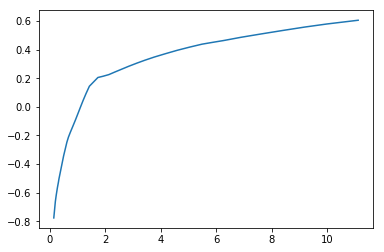

In [18]:
plt.plot(df['star_mass'],df['log_R'])
plt.show()

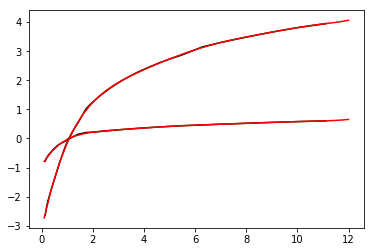

In [19]:
# Fit log_L then log_R as a function of log(mass) using polynomials
FitLfuncM = np.polyfit((df['star_mass']), df['log_L'], 8)
FitRfuncM = np.polyfit((df['star_mass']), df['log_R'], 8)


# Convenience function to easily call the polynomials as functions 
# These are the functions you will need to use
# example: Luminosity for a 1 solar mass star: PolyLfuncM((1.))
# It hence takes logs and output logs
PolyLfuncM = np.poly1d(FitLfuncM)
PolyRfuncM = np.poly1d(FitRfuncM)



############################## PLOT ############################
# stellar mass array
arraytest = np.linspace(0.1,12.,len(df['log_R']))

# Compare fit and data for R and L func of M
plt.plot((df['star_mass']),df['log_R'], color='black')
plt.plot((arraytest),PolyRfuncM((arraytest).reshape((len(arraytest),1))), color='red')

plt.plot((df['star_mass']),df['log_L'], color='black')
plt.plot((arraytest),PolyLfuncM((arraytest).reshape((len(arraytest),1))), color='red')

plt.show()
############################## END sPLOT ############################
